# Linear Regression using Python

### Task 1: Introduction

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### Task 2: Dataset

Let's say we are working as a real estate agent, and one of our tasks
is to estimate the price of houses, given some information
about those houses. Over the years, we have come
to realize that there is a linear relationship
between the market price of the house and their area.
We've also come to realize that there is a similar
relationship between the price and the distance
of the property from the city center.

Let's say that we have a lot of data of various houses that
we have sold over the years, and their areas and distance
from the city center is available to us. So we make a table
with that information.


Real estate agent table:

|Area|Distance|Price|
|---|---|---|
|70|3|21200|
|50|1|22010|
|120|9|24305|
|100|2|31500|

It is clear to us that the price is dependent on area
and distance based on our experience. What we can do is write
the relationship with a 2-variable linear equation:


where:  
- __y__ is the price.  
- __b__ is some sort of intercept or bias
- __w__ is the weight. We dont know yet what these values are.
- __x1__ is the area.
- __x2__ is the distance

---
$
\begin{equation}
y = b + w_1.x_1 + w_2.x_2
\end{equation}
$

---
We can also represent the equation in a vector form:

---
$
\begin{equation}
y = b + (w_1 w_2).\binom{x_1}{x_2}
\end{equation}
$

---
Where
$
\begin{equation}
W = (w_1 w_2)
\end{equation}
$
and
$
\begin{equation}
X = \binom{x_1}{x_2}
\end{equation}
$

We have a lot of observed data for Y and X,
but we don't know the values for __b__ and __W__.
Of course, the relationship may not even be linear, but that's the assumption that we are going to use here, that
the mathematical model is a linear equation with two independent variables.

#### Scenario  
You're a savvy real estate agent. You realize that if you can find these values, you will have
a good mathematical model, which will be able to predict market value for various houses
if the area of the house and distance from the city center are known. In order to have the mathematical model,
though, you need to find the values for __W__ and __b__ that best fit the data that you already have observed. So that's essentially what we do in linear regression. We find the optimal values for parameters w and b, that best fit
the given data.

For the puprose of this project, we'll create a function that will gnerate the data for __W__ and __b__.

Normally this would be observed data, but for our example, we will generate it ourselves and using
some true values for __W__ and __b__.
Then we will add some noise to it as well just to simulate observed data; something that fits a linear
equation but not perfectly. It has some element of randomness and has some sort of noise to it as well.

In [8]:
def generate_examples(num=1000):
    W = [1.0, -3.0] # our W is simply a vector. We are making it two dimensional similar to our example.
    b = 1.0 # our b is simply a scaler value.
    
    # reshape W and set the shape new shape to 2 by 1 using numpy.
    W = np.reshape(W, (2,1))
    # the reason is that if we don't do this, what we will see is that W will have a shape of simply
    # (2,), essentially representing a python list. But when we use vector computations later on, we want
    # to explicitly set the the dimensions. So two for the number of elements that this W has
    # and one is the total b elements in it.
    
    # gnerate random number for X; refers to the number of examples by two.
    X = np.random.randn(num, 2) # Because we have x1 and x2 so that's that's the shape that we're going with.
    
    # let's calculate y and add some noise (random)
    y = b + np.dot(X, W) + np.random.rand()
    
    # ensure that we explicitly set the dimensions
    y = np.reshape(y, (num, 1)) 
    # 1 means we're adding a dimension here so that we don't get any errors later on as 
    # as we do more of metrics computations.
    
    #return X and y
    return X, y

Let's see if this works. Let's generate a set using generate_examples.

In [9]:
X, y = generate_examples()

# take a look at the shape of X and y
print(X.shape, y.shape)

(1000, 2) (1000, 1)


As expected, we have 1000 examples with two features or independent variables
and 1000 examples and one dependent variable.


Let's also quickly take a look at how the values look like. (Not that it's very important right now.)

In [10]:
print(X[0], y[0])

[ 0.96134716 -1.00874313] [5.95172838]


We have basically a bunch of randomly generated numbers
and whatever y value calculated for in those numbers.

So we understand what linear regression is to a degree, and we have a way to generate data for X and y.
Now, how do we solve for parameters __W__ and __b__?

### Task 3: Initialize Parameters

We will find the values for parameters W and b by using gradient descent algorithm.

We start by assigning some random values to parameters W
and b. Then we calculate the Y value for those parameters
for some X. This is our predicted value for y, for current values
of the parameters. Then we compare this predicted value
with the actual value that we have for that X.

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

The difference between the prediction and the true value
is called loss.
There are various loss functions that can be used, but we
will use mean squared error. Mean squared error can be represented something like this.

Essentially, you're calculating a mean of the error between y and y prediction, also known as y hat, which read as error in squared. We're calculating the mean hence, means squared error.

Now we're assuming that we have examples here, so we are just averaging the squared error for all the examples.

The term 1/2m is not of great significance though, since this is a constant term. We can also call it one half mean squared because of the one half added to this loss.

The objective of the gradient descent algorithm is to minimize this loss value.


Gradient Descent Objective is to 
$
\begin{equation}
min(J)
\end{equation}
$

In [6]:
# Let's first create a model with the parameters W and b
class Model: # define a class and call it model
    # instantiate it
    def __init__(self, num_features): # pass the number of features which is the number of independent variables(2: 1 for area and 1 for city centers)
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1) # the weight from our linear equation and initialize to np.random 
        self.b = np.random.randn()

Of course, this is not our complete model. There's a lot of functionality to be added for creating
a training loop and computing loss and everything that goes with the gradient descent algorithm.
But this is just a starting point.

Let's test it out.

In [7]:
model = Model(2)
print(model.W)
print(model.b)

[[ 0.28644343]
 [-0.00223019]]
1.426552412981412


This looks to be in the shape that we talked about before.

The values in the bottom is a scale of value.

Now that we have the starting point, we have some random values for our parameters W and b, let's keep working on our model and implement
the functionality required to perform optimization
of these parameters with the help of gradient descent.

### Task 4: Forward Pass

The gradient descent algorithm can be simplified in 4 steps:

1. Get predictions y_hat for X with current values of W and b.
2. Compute the loss between y and y_hat
3. Find gradients of the loss with respect to parameters W and b
4. Update the values of W and b by subtracting the gradient values obtained in the previous step

Let's simplify our linear equation a bit more for an example:
$
\begin{equation}
y = wx
\end{equation}
$

Let's plot J as a function of w

![Loss vs Param](JvsW.png)

The gradients of loss with respect to w:

\begin{equation}
\frac{dJ}{dw} = \frac{\delta{J}}{\delta{w}} = \lim_{\epsilon \to 0} \frac{J(w + \epsilon) - J(w)}{\epsilon}
\end{equation}

In [11]:
# Now let's complete our model
class Model(Model):
    def forward_pass(self, X): # X in this could be a multidimensional but basically X is the set of inputs that we have
        y_hat = self.b + np.dot(X, self.W)
        return y_hat

In [12]:
# y_hat is teh frist step in our gradient descent algorithm
# let's test it out and instantiate a model
y_hat = Model(2).forward_pass(X)
print(y_hat.shape)

(1000, 1)


We have 1000 examples. Each example here for y-hat is a single
value.

Let's take a look at one of them.

In [13]:
print(y_hat.shape, y_hat[0])

(1000, 1) [-1.67931601]


### Task 5: Compute Loss

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

In [14]:
# extend our model class again. Add another function that will compute loss.
class Model(Model):
    def compute_loss(self, y_hat, y_true):
        return np.sum(np.square(y_hat - y_true)) / (2*y_hat.shape[0]) # m is the nubmer of examples

In [15]:
# calculate the loss for a model with 2 features
model = Model(2)
y_hat = model.forward_pass(X) #This will give us all the predictions for all the examples.
loss = model.compute_loss(y_hat, y)

Check for the loss.

In [16]:
loss

6.320634577393588

We have 6.3. If we run the whole notebook again, we may get a different value because the loss are randomize, the X is randomize.

Great! We have a function that computes loss.

### Task 6: Backward Pass

The gradient of loss with respect to bias can be calculated with:

$
\begin{equation}
\frac{dJ}{db} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)})
\end{equation}
$

$
\begin{equation}
\frac{dJ}{dW_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)}).x_j^{(i)}
\end{equation}
$

When we use machine learning libraries like tensorflow,
they do the backward pass automatically and give you
the gradients for loss with respect to various parameters.

They do it by using automatic differentiation.

No, we are going to use just the formulas that are written
here for gradients of loss with respect to __b__, and gradient
of loss with respect to parameters 
__W__.

In [17]:
# extend our model class
# So let's define a backward pass. We will need X, y-hat and y.
class Model(Model):
    def backward_pass(self, X, y_true, y_hat):
        m = y_true.shape[0] #number of examples
        db = (1/m)*np.sum(y_hat - y_true) # thegradient with respect to b
        dW = (1/m)*np.sum(np.dot(np.transpose(y_hat - y_true), X), axis=0) #dW is the gradient for loss for with respect to W
        return dW, db

In [18]:
# let's test it out
model = Model(2)

X, y = generate_examples()
y_hat = model.forward_pass(X)

dW, db = model.backward_pass(X, y, y_hat)

In [20]:
print(dW, db)

# if everything works correctly, then we should see that dW is going to be a list of just two numbers.
# So one row and two columns; db is going to be a scalar.

[-2.40298073  5.15426648] -1.2337553161369823


And that's what we see.

### Task 7: Update Parameters

In [21]:
# extend our model class
# add functionality to update the parameter values
# We will also need something called Learning Rate, or Alpha.
class Model(Model):
    def update_params(self, dW, db, lr):
        self.W = self.W - lr * np.reshape(dW, (self.num_features, 1)) #dW needs to be reshaped.
        self.b = self.b - db

### Task 8: Training Loop

In [27]:
# let's extend the model again
class Model(Model):
    def train(self, x_train, y_train, iterations, lr): # iterations means how many time gradient steps.
        losses = [] # track our losses
        for i in range(0, iterations):
            y_hat = self.forward_pass(x_train)
            loss = self.compute_loss(y_hat, y_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            #update the parameters
            self.update_params(dW, db, lr)
            #keep track of athe losses
            losses.append(loss)
            if i%int(iterations/10) == 0:
            # if the iteration is 1/10 of total iterations,
            # then we want to print out the loss value just so that we
            # can see the training is going in the right direction or not.
                print('Iter: {}, Loss: {:.4f}'.format(i, loss))
        return losses

In [28]:
model = Model(2)

In [29]:
x_train, y_train = generate_examples()

In [30]:
losses = model.train(x_train, y_train, 1000, 3e-3)

Iter: 0, Loss: 9.3290
Iter: 100, Loss: 3.5795
Iter: 200, Loss: 1.8848
Iter: 300, Loss: 0.9925
Iter: 400, Loss: 0.5226
Iter: 500, Loss: 0.2752
Iter: 600, Loss: 0.1449
Iter: 700, Loss: 0.0763
Iter: 800, Loss: 0.0402
Iter: 900, Loss: 0.0212


There we go. We start with 9.3 or so loss value, and then it decreases consistently, which is good, because it is what we want.

So let's take a look at the losses.

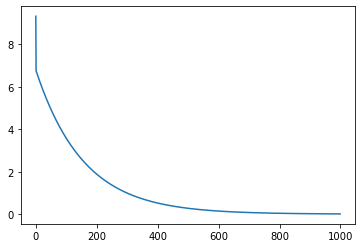

In [32]:
plt.plot(losses);

So as the training goes on, it reduces and gets pretty close to zero.

Now that we have a model trained on on our generated data, let's take a look at some of the predictions.

### Task 9: Predictions

In [33]:
model_untrained = Model(2)

x_test, y_test = generate_examples(500)
print(x_test.shape, y_test.shape)

(500, 2) (500, 1)


In [34]:
# let's get predictions from the untrained model
preds_untrained = model_untrained.forward_pass(x_test)
preds_trained = model.forward_pass(x_test)

Now to compare, let's create a pyplot figure.

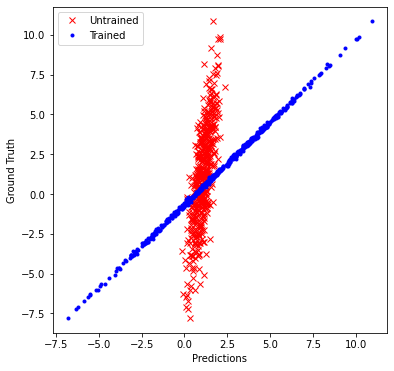

In [35]:
plt.figure(figsize=(6, 6))
plt.plot(preds_untrained, y_test, 'rx', label='Untrained')
plt.plot(preds_trained, y_test, 'b.', label='Trained')
plt.legend()
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')
plt.show()

So the train model looks more like a straight line,
and that is good.
There is some deviation there, but more or less it's a straight line. That tells us that the ground
truth and prediction for this model with the blue dots are very, very close to each other.
That's why it's a It's a straight line.

Whereas the predictions with the untrained model
is not in a straight line.
And even if it was a straight line, it's not at a 45 degree angle, so they are way off, basically.


Now, if we want, we can run these three codes
cells again to get some other untrained model and some with some other randomized values for W and B and then compare the predictions.

(500, 2) (500, 1)


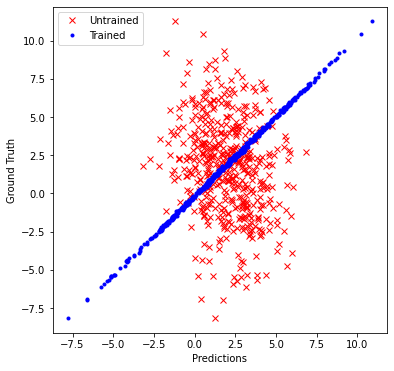

In [36]:
model_untrained = Model(2)

x_test, y_test = generate_examples(500)
print(x_test.shape, y_test.shape)

#get predictions from the untrained model
preds_untrained = model_untrained.forward_pass(x_test)
preds_trained = model.forward_pass(x_test)

# plot
plt.figure(figsize=(6, 6))
plt.plot(preds_untrained, y_test, 'rx', label='Untrained')
plt.plot(preds_trained, y_test, 'b.', label='Trained')
plt.legend()
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')
plt.show()

We'll observe a similar result that the read x's here, which is from the untrained model, they're completely
random and they don't really make sense with the ground truth.

Whereas the blue dots, they make sense. They're at a 45 degree angle. It's a straight line, and that means that they essentially match up with the ground truth.